In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os


In [3]:
dataset_url = "http://madm.dfki.de/files/sentinel/EuroSAT.zip"
data_dir = tf.keras.utils.get_file(origin=dataset_url, fname='EuroSAT', extract=True)


94280567/94280567 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)

batch_size = 32
img_height = 64
img_width = 64

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 27000 files belonging to 1 classes.
Using 21600 files for training.
Found 27000 files belonging to 1 classes.
Using 5400 files for validation.


In [5]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)  # 10 classes
])


In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [7]:
epochs = 5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 92s 133ms/step - accuracy: 0.9934 - loss: 0.0347 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 87s 129ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 143s 131ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 141s 130ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 142s 130ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [10]:
model.save("land_classifier_model.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted: 2750


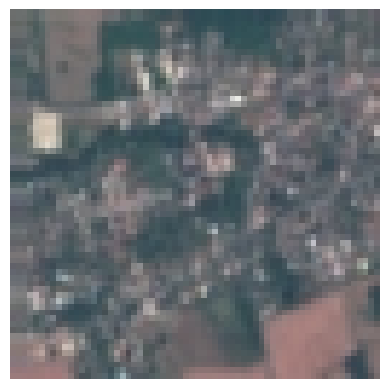

In [12]:
class_names = train_ds.class_names

for images, labels in val_ds.take(1):
  sample_image = images[0]
  plt.imshow(sample_image.numpy().astype("uint8"))
  plt.axis("off")

  img_array = tf.expand_dims(sample_image, 0)
  predictions = model.predict(img_array)
  predicted_class = class_names[np.argmax(predictions)]
  print("Predicted:", predicted_class)


In [13]:
for image, label in val_ds.take(1):
    prediction = model.predict(image)
    print("Predicted:", np.argmax(prediction[0]), "Actual:", label[0].numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Predicted: 0 Actual: 0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


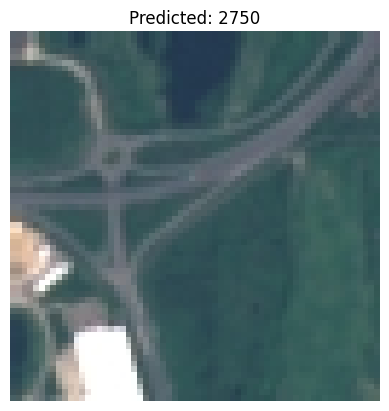

In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a test image from the validation set
test_image_path = val_ds.file_paths[0]

# Load and preprocess the image
img = image.load_img(test_image_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict
pred = model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]

# Show image and prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()
